In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Charger les données CSV
df = pd.read_csv('../CSV/analyse_moyen_action.csv')

In [15]:
# Convertir la colonne 'date' en format datetime (au cas où elle ne l'est pas déjà)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pk_evenement     44 non-null     int64         
 1   nom_evenement    44 non-null     object        
 2   type             44 non-null     object        
 3   date             44 non-null     datetime64[ns]
 4   pays             44 non-null     object        
 5   pk_moyen_action  44 non-null     int64         
 6   nom_moyen        44 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.5+ KB
None


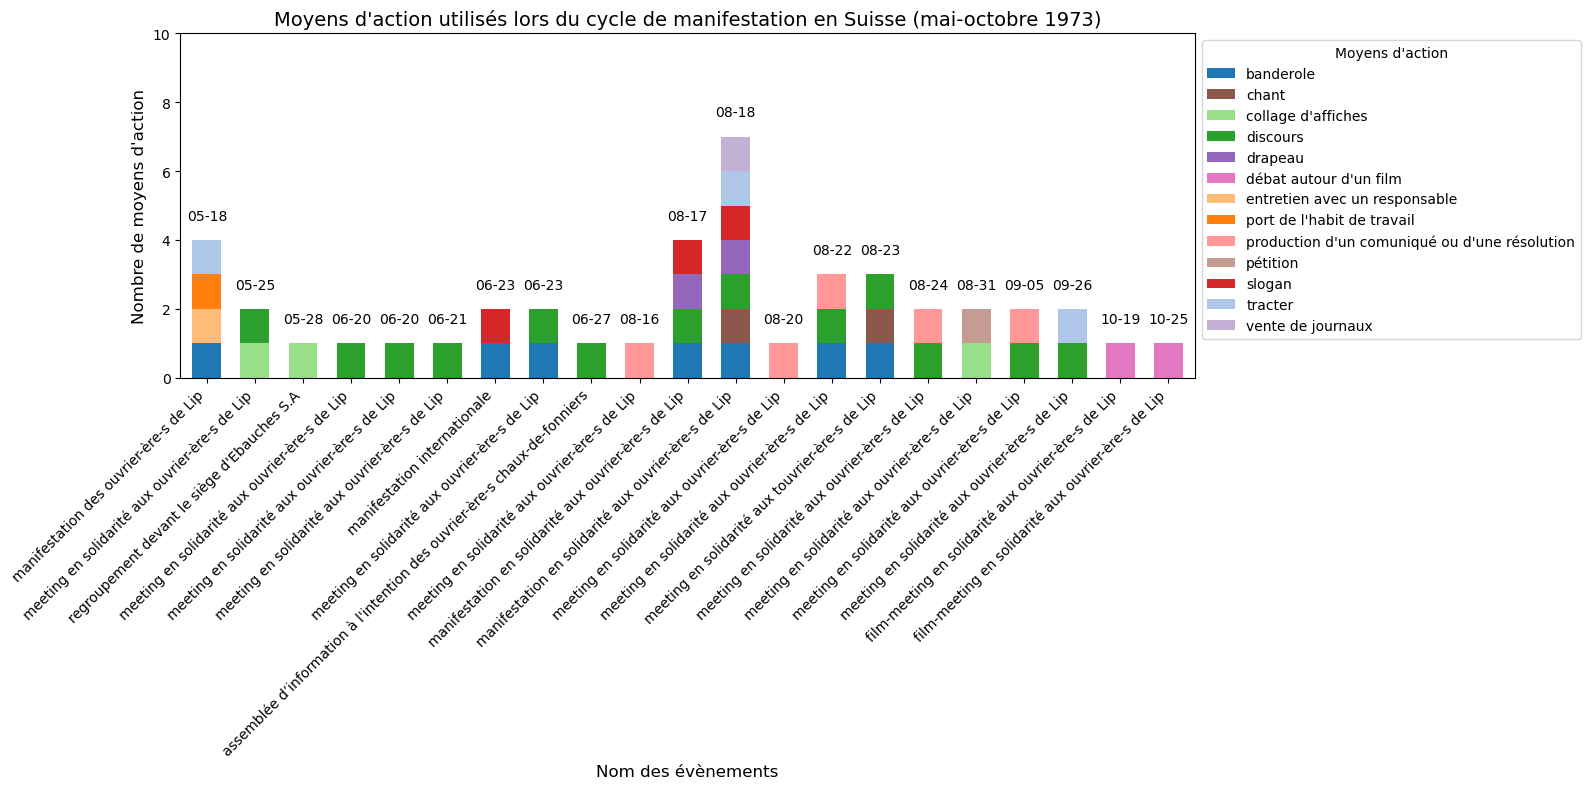

In [23]:
# Filtrer les événements entre mai et juin 1973
df_filtered = df[(df['date'] >= pd.to_datetime('1973-05-01')) & (df['date'] <= pd.to_datetime('1973-11-30'))]

# Trier les événements par date (assurer l'ordre chronologique)
df_sorted = df_filtered.sort_values(by='date')

# Créer une nouvelle colonne avec seulement le mois et le jour (format MM-DD)
df_sorted['mois_jour'] = df_sorted['date'].dt.strftime('%m-%d')  # Format "MM-DD" (ex: 05-18)

# Créer un tableau pivot avec 'mois_jour' pour l'affichage et les moyens d'action
df_pivot = df_sorted.pivot_table(index=["mois_jour", "pk_evenement", "nom_evenement"], 
                                 columns="nom_moyen", 
                                 aggfunc="size", 
                                 fill_value=0)

# Renommer les colonnes ici pour que le nom des moyens d'action soit plus clair
df_pivot.columns.name = "Moyens d'action"

# Assurer un ordre chronologique en utilisant 'mois_jour' pour l'affichage des dates
df_pivot = df_pivot.sort_index(level="mois_jour")

# Supprimer 'pk_evenement' de l'affichage final (on garde la structure pour le calcul)
df_pivot = df_pivot.reset_index(level="pk_evenement", drop=True)

# Générer une palette de couleurs unique pour chaque nom_moyen avec tab20
unique_nom_moyen = df_sorted['nom_moyen'].unique()
num_colors = len(unique_nom_moyen)

# Utiliser la colormap tab20
colormap = plt.colormaps['tab20']
colors = [colormap(i / 20) for i in range(num_colors)]

# Associer chaque nom_moyen à une couleur
color_dict = dict(zip(unique_nom_moyen, colors))

# Créer un graphique à barres empilées
fig, ax = plt.subplots(figsize=(16, 8))  # Augmenter la largeur du graphique

# Tracer les barres avec les couleurs personnalisées
df_pivot.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.6,
    color=[color_dict[col] for col in df_pivot.columns],
)

# Ajouter les labels et le titre
plt.title("Moyens d'action utilisés lors du cycle de manifestation en Suisse (mai-octobre 1973)",fontsize=14)
plt.xlabel("Nom des évènements",fontsize=12)
plt.ylabel("Nombre de moyens d'action",fontsize=12)

# Rotation des labels de l'axe X pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement des marges pour donner de l'espace à la légende
plt.subplots_adjust(bottom=0.25, top=0.85, left=0.1, right=0.75)

# Afficher la date (mois-jour) au-dessus des barres (en utilisant 'mois_jour')
for i, (mois_jour, event) in enumerate(df_pivot.index):
    ax.text(i, df_pivot.iloc[i].sum() + 0.5, str(mois_jour), ha='center', va='bottom', fontsize=10)

# Afficher les noms des événements en dessous des barres (sur l'axe X)
plt.xticks(ticks=range(len(df_pivot.index)), labels=[f"{event}" for _, event in df_pivot.index], rotation=45, ha='right')

# Forcer l'axe Y à avoir un maximum de 5, même si les données sont plus petites
ax.set_ylim(0, 10)

# Placer la légende en haut à droite
plt.legend(title="Moyens d'action", bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10)

# Sauvegarder l'image en format PNG
plt.savefig('moyens_action_cycle_2.png', format='png', bbox_inches='tight', dpi=300)

# Afficher le graphique
plt.tight_layout()
plt.show()

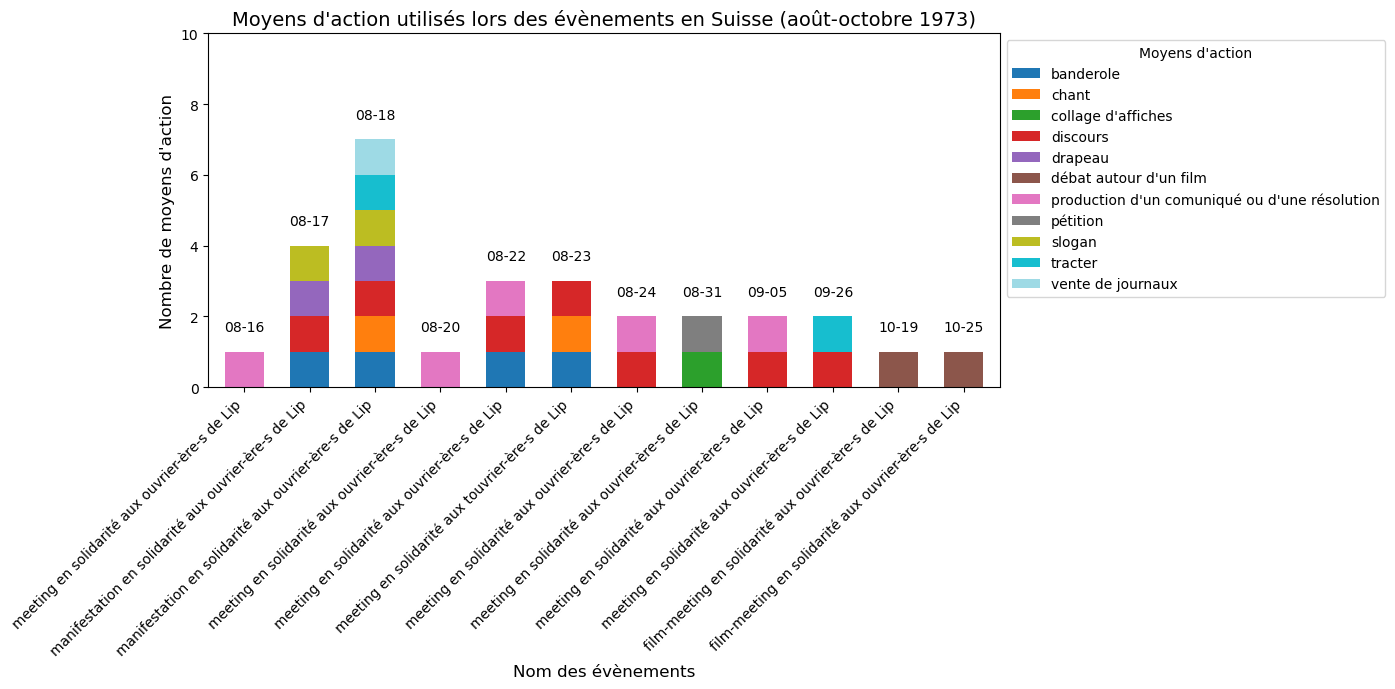

In [29]:


# Filtrer les événements entre mai et juin 1973
df_filtered = df[(df['date'] >= pd.to_datetime('1973-07-01')) & (df['date'] <= pd.to_datetime('1973-11-30'))]

# Trier les événements par date (assurer l'ordre chronologique)
df_sorted = df_filtered.sort_values(by='date')

# Créer une nouvelle colonne avec seulement le mois et le jour (format MM-DD)
df_sorted['mois_jour'] = df_sorted['date'].dt.strftime('%m-%d')  # Format "MM-DD" (ex: 05-18)

# Créer un tableau pivot avec 'mois_jour' pour l'affichage et les moyens d'action
df_pivot = df_sorted.pivot_table(index=["mois_jour", "pk_evenement", "nom_evenement"], 
                                 columns="nom_moyen", 
                                 aggfunc="size", 
                                 fill_value=0)

# Renommer les colonnes ici pour que le nom des moyens d'action soit plus clair
df_pivot.columns.name = "Moyens d'action"

# Assurer un ordre chronologique en utilisant 'mois_jour' pour l'affichage des dates
df_pivot = df_pivot.sort_index(level="mois_jour")

# Supprimer 'pk_evenement' de l'affichage final (on garde la structure pour le calcul)
df_pivot = df_pivot.reset_index(level="pk_evenement", drop=True)

# Créer un graphique à barres empilées
fig, ax = plt.subplots(figsize=(14, 7))  # Augmenter la largeur du graphique

# Création du graphique avec un colormap 'tab10' et largeur des barres réduite
df_pivot.plot(kind="bar", stacked=True, ax=ax, width=0.6, colormap="tab20")  # 'tab20' pour des couleurs variées

# Ajouter les labels et le titre
plt.title("Moyens d'action utilisés lors des évènements en Suisse (août-octobre 1973)",fontsize=14 )
plt.xlabel("Nom des évènements", fontsize=12)
plt.ylabel("Nombre de moyens d'action", fontsize=12)

# Rotation des labels de l'axe X pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement des marges pour donner de l'espace à la légende
plt.subplots_adjust(bottom=0.25, top=0.85, left=0.1, right=0.75)

# Afficher la date (mois-jour) au-dessus des barres (en utilisant 'mois_jour')
for i, (mois_jour, event) in enumerate(df_pivot.index):
    ax.text(i, df_pivot.iloc[i].sum() + 0.5, str(mois_jour), ha='center', va='bottom', fontsize=10)

# Afficher les noms des événements en dessous des barres (sur l'axe X)
plt.xticks(ticks=range(len(df_pivot.index)), labels=[f"{event}" for _, event in df_pivot.index], rotation=45, ha='right')

# Forcer l'axe Y à avoir un maximum de 5, même si les données sont plus petites
ax.set_ylim(0, 10)

# Placer la légende en haut à droite
plt.legend(title="Moyens d'action", bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10)

# Sauvegarder l'image en format PNG
plt.savefig('moyens_actions_aout_oct.png', format='png', bbox_inches='tight', dpi=300)

# Afficher le graphique
plt.tight_layout()
plt.show()


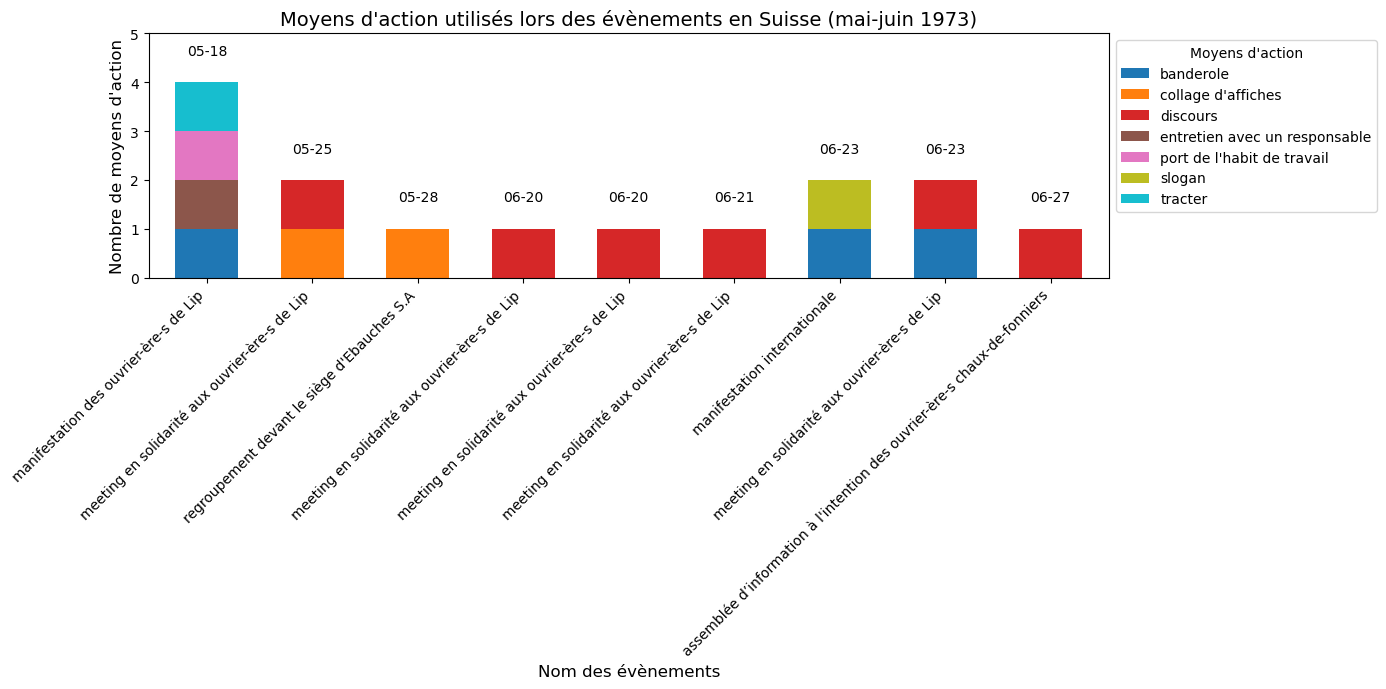

In [33]:



# Filtrer les événements entre mai et juin 1973
df_filtered = df[(df['date'] >= pd.to_datetime('1973-05-01')) & (df['date'] <= pd.to_datetime('1973-06-30'))]

# Trier les événements par date (important pour garder l'ordre chronologique)
df_sorted = df_filtered.sort_values(by='date')

# Créer une nouvelle colonne avec seulement le jour et le mois pour l'affichage
df_sorted['jour_mois'] = df_sorted['date'].dt.strftime('%m-%d') 

# Créer un tableau pivot avec 'pk_evenement' pour une identification unique, 'jour_mois', et 'nom_evenement'
df_pivot = df_sorted.pivot_table(index=["jour_mois", "pk_evenement", "nom_evenement"], 
                                 columns="nom_moyen", 
                                 aggfunc="size", 
                                 fill_value=0)

# Renommer les colonnes pour que le nom des moyens d'action soit plus clair
df_pivot.columns.name = "Moyens d'action"

# Assurer un ordre chronologique en utilisant 'date' sur l'axe des X (tri effectué sur 'date', mais on affiche 'jour_mois')
df_pivot = df_pivot.sort_index(level="jour_mois")

# Supprimer 'pk_evenement' de l'affichage final (on garde la structure pour le calcul)
df_pivot = df_pivot.reset_index(level="pk_evenement", drop=True)

# Créer un graphique à barres empilées
fig, ax = plt.subplots(figsize=(14, 7))  # Augmenter la largeur du graphique

# Création du graphique avec un colormap 'tab10' et largeur des barres réduite
df_pivot.plot(kind="bar", stacked=True, ax=ax, width=0.6, colormap="tab10")  # 'tab10' pour des couleurs variées

# Ajouter les labels et le titre
plt.title("Moyens d'action utilisés lors des évènements en Suisse (mai-juin 1973)", fontsize=14)
plt.xlabel("Nom des évènements", fontsize=12)
plt.ylabel("Nombre de moyens d'action", fontsize=12)

# Rotation des labels de l'axe X pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement des marges pour donner de l'espace à la légende
plt.subplots_adjust(bottom=0.25, top=0.85, left=0.1, right=0.75)

# Afficher la date (jour-mois) au-dessus des barres (en utilisant 'jour_mois')
for i, (jour_mois, event) in enumerate(df_pivot.index):
    ax.text(i, df_pivot.iloc[i].sum() + 0.5, str(jour_mois), ha='center', va='bottom', fontsize=10)

# Afficher les noms des événements en dessous des barres (sur l'axe X)
plt.xticks(ticks=range(len(df_pivot.index)), labels=[f"{event}" for _, event in df_pivot.index], rotation=45, ha='right')

# Forcer l'axe Y à avoir un maximum de 5, même si les données sont plus petites
ax.set_ylim(0, 5)

# Placer la légende en haut à droite
plt.legend(title="Moyens d'action", bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=10)
# Sauvegarder l'image en format PNG
plt.savefig('moyens_actions_mai_juin.png', format='png', bbox_inches='tight', dpi=300)

# Afficher le graphique
plt.tight_layout()
plt.show()

